In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Dataset used
https://www.kaggle.com/drgfreeman/rockpaperscissors

In [2]:
# folder name
img_path = 'rockpaperscissors'

In [3]:
batch = 32
train_data = ImageDataGenerator(rescale=1./255,rotation_range=12.,width_shift_range=0.2,
                                height_shift_range=0.2,zoom_range=0.15,horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)

In [4]:
train = train_data.flow_from_directory('rockpaperscissors',target_size=(300,200),color_mode='grayscale',
                                      batch_size=batch,class_mode='categorical')


Found 2188 images belonging to 3 classes.


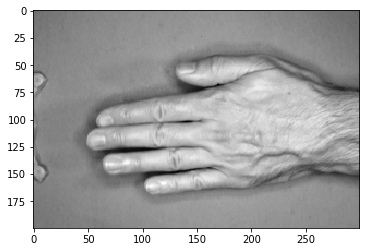

In [5]:
data_dir = 'rockpaperscissors'
categories = ['paper','rock','scissors']
for cat in categories:
    path = os.path.join(data_dir,cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

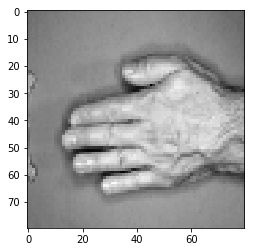

In [6]:
IMG_SIZE =80
new_arr = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_arr,cmap='gray')
plt.show()

In [7]:
train_data = []
def create_train_data():
    for cat in categories:
        path = os.path.join(data_dir,cat)
        class_num = categories.index(cat)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_arr = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                train_data.append([new_arr,class_num])
            except Exception as e:
                pass
create_train_data() 

In [8]:
import random
random.shuffle(train_data)

In [ ]:
for sample in train_data:
    print(sample[1])

In [53]:
X = []
y = []

for features,labels in train_data:
    X.append(features)
    y.append(labels)
    
#we cant directly pass list to Neural Network so need to convert it to numpy array
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE, 1)
X = X/255.0

<class 'numpy.ndarray'>


In [54]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)
y_train = to_categorical(y_train)
X_test = X_test/255.0
y_test = to_categorical(y_test)
print(len(X_train))
print(len(y_binary))
print(len(X_test))
print(len(y_test))

1465
1465
723
723


In [57]:
#to normalize the images
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)


In [62]:
model = Sequential()
model.add(Conv2D(64,(5,5),input_shape=(80,80,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])


In [63]:
model.fit(X_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
1465/1465 [==============================] - 24s 16ms/sample - loss: 1.0612 - acc: 0.4143
Epoch 2/10
1465/1465 [==============================] - 22s 15ms/sample - loss: 0.5914 - acc: 0.7959
Epoch 3/10
1465/1465 [==============================] - 21s 15ms/sample - loss: 0.3443 - acc: 0.8928
Epoch 4/10
1465/1465 [==============================] - 22s 15ms/sample - loss: 0.2163 - acc: 0.9352
Epoch 5/10
1465/1465 [==============================] - 22s 15ms/sample - loss: 0.1615 - acc: 0.9522
Epoch 6/10
1465/1465 [==============================] - 22s 15ms/sample - loss: 0.1375 - acc: 0.9577
Epoch 7/10
1465/1465 [==============================] - 22s 15ms/sample - loss: 0.1323 - acc: 0.9611
Epoch 8/10
1465/1465 [==============================] - 21s 15ms/sample - loss: 0.0828 - acc: 0.9768
Epoch 9/10
1465/1465 [==============================] - 22s 15ms/sample - loss: 0.0683 - acc: 0.9802
Epoch 10/10
1465/1465 [==============================] - 21s 15ms/sample - loss: 0.0456 - a

In [73]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)
predictions = model.predict(X_test)
print(predictions[170])
np.argmax(predictions[170])

723/723 [==============================] - 3s 5ms/sample - loss: 0.1654 - acc: 0.9640
Test accuracy: 0.9640387
[2.3001351e-03 9.9769920e-01 6.6101853e-07]


1

In [74]:
def prepare(filepath):
    IMG_SIZE = 80
    img_arr = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
    return new_arr.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [76]:
prediction = model.predict([prepare("D:/datasets/New folder/paper2.png")])
print(prediction)

[[1. 0. 0.]]
